# Create a PWR full-core model.

This model is the OECD/NEA Monte Carlo Performance benchmark which is a grossly simplified pressurized water reactor (PWR) with 241 fuel assemblies. Note that the number of particles/batches is initially set very low for testing purposes.


In [1]:
%matplotlib inline
import openmc
import numpy as np

In [2]:
# Define materials.
fuel = openmc.Material(1, name='UOX fuel')
fuel.set_density('g/cm3', 10.062)
fuel.add_nuclide('U234', 4.9476e-6)
fuel.add_nuclide('U235', 4.8218e-4)
fuel.add_nuclide('U238', 2.1504e-2)
fuel.add_nuclide('Xe135', 1.0801e-8)
fuel.add_nuclide('O16', 4.5737e-2)
fuel.volume = (17*17 - 25) * np.pi*2*0.41 *241 * (183*2)

clad = openmc.Material(2, name='Zircaloy')
clad.set_density('g/cm3', 5.77)
clad.add_nuclide('Zr90', 0.5145)
clad.add_nuclide('Zr91', 0.1122)
clad.add_nuclide('Zr92', 0.1715)
clad.add_nuclide('Zr94', 0.1738)
clad.add_nuclide('Zr96', 0.0280)

cold_water = openmc.Material(3, name='Cold borated water')
cold_water.set_density('atom/b-cm', 0.07416)
cold_water.add_nuclide('H1', 2.0)
cold_water.add_nuclide('O16', 1.0)
cold_water.add_nuclide('B10', 6.490e-4)
cold_water.add_nuclide('B11', 2.689e-3)
cold_water.add_s_alpha_beta('c_H_in_H2O')

hot_water = openmc.Material(4, name='Hot borated water')
hot_water.set_density('atom/b-cm', 0.06614)
hot_water.add_nuclide('H1', 2.0)
hot_water.add_nuclide('O16', 1.0)
hot_water.add_nuclide('B10', 6.490e-4)
hot_water.add_nuclide('B11', 2.689e-3)
hot_water.add_s_alpha_beta('c_H_in_H2O')

rpv_steel = openmc.Material(5, name='Reactor pressure vessel steel')
rpv_steel.set_density('g/cm3', 7.9)
rpv_steel.add_nuclide('Fe54', 0.05437098, 'wo')
rpv_steel.add_nuclide('Fe56', 0.88500663, 'wo')
rpv_steel.add_nuclide('Fe57', 0.0208008, 'wo')
rpv_steel.add_nuclide('Fe58', 0.00282159, 'wo')
rpv_steel.add_nuclide('Ni58', 0.0067198, 'wo')
rpv_steel.add_nuclide('Ni60', 0.0026776, 'wo')
rpv_steel.add_nuclide('Mn55', 0.01, 'wo')
rpv_steel.add_nuclide('Cr52', 0.002092475, 'wo')
rpv_steel.add_nuclide('C13', 0.0025, 'wo')
rpv_steel.add_nuclide('Cu63', 0.0013696, 'wo')

lower_rad_ref = openmc.Material(6, name='Lower radial reflector')
lower_rad_ref.set_density('g/cm3', 4.32)
lower_rad_ref.add_nuclide('H1', 0.0095661, 'wo')
lower_rad_ref.add_nuclide('O16', 0.0759107, 'wo')
lower_rad_ref.add_nuclide('B10', 3.08409e-5, 'wo')
lower_rad_ref.add_nuclide('B11', 1.40499e-4, 'wo')
lower_rad_ref.add_nuclide('Fe54', 0.035620772088, 'wo')
lower_rad_ref.add_nuclide('Fe56', 0.579805982228, 'wo')
lower_rad_ref.add_nuclide('Fe57', 0.01362750048, 'wo')
lower_rad_ref.add_nuclide('Fe58', 0.001848545204, 'wo')
lower_rad_ref.add_nuclide('Ni58', 0.055298376566, 'wo')
lower_rad_ref.add_nuclide('Mn55', 0.0182870, 'wo')
lower_rad_ref.add_nuclide('Cr52', 0.145407678031, 'wo')
lower_rad_ref.add_s_alpha_beta('c_H_in_H2O')

upper_rad_ref = openmc.Material(
    7, name='Upper radial reflector / Top plate region')
upper_rad_ref.set_density('g/cm3', 4.28)
upper_rad_ref.add_nuclide('H1', 0.0086117, 'wo')
upper_rad_ref.add_nuclide('O16', 0.0683369, 'wo')
upper_rad_ref.add_nuclide('B10', 2.77638e-5, 'wo')
upper_rad_ref.add_nuclide('B11', 1.26481e-4, 'wo')
upper_rad_ref.add_nuclide('Fe54', 0.035953677186, 'wo')
upper_rad_ref.add_nuclide('Fe56', 0.585224740891, 'wo')
upper_rad_ref.add_nuclide('Fe57', 0.01375486056, 'wo')
upper_rad_ref.add_nuclide('Fe58', 0.001865821363, 'wo')
upper_rad_ref.add_nuclide('Ni58', 0.055815129186, 'wo')
upper_rad_ref.add_nuclide('Mn55', 0.0184579, 'wo')
upper_rad_ref.add_nuclide('Cr52', 0.146766614995, 'wo')
upper_rad_ref.add_s_alpha_beta('c_H_in_H2O')

bot_plate = openmc.Material(8, name='Bottom plate region')
bot_plate.set_density('g/cm3', 7.184)
bot_plate.add_nuclide('H1', 0.0011505, 'wo')
bot_plate.add_nuclide('O16', 0.0091296, 'wo')
bot_plate.add_nuclide('B10', 3.70915e-6, 'wo')
bot_plate.add_nuclide('B11', 1.68974e-5, 'wo')
bot_plate.add_nuclide('Fe54', 0.03855611055, 'wo')
bot_plate.add_nuclide('Fe56', 0.627585036425, 'wo')
bot_plate.add_nuclide('Fe57', 0.014750478, 'wo')
bot_plate.add_nuclide('Fe58', 0.002000875025, 'wo')
bot_plate.add_nuclide('Ni58', 0.059855207342, 'wo')
bot_plate.add_nuclide('Mn55', 0.0197940, 'wo')
bot_plate.add_nuclide('Cr52', 0.157390026871, 'wo')
bot_plate.add_s_alpha_beta('c_H_in_H2O')

bot_nozzle = openmc.Material(9, name='Bottom nozzle region')
bot_nozzle.set_density('g/cm3', 2.53)
bot_nozzle.add_nuclide('H1', 0.0245014, 'wo')
bot_nozzle.add_nuclide('O16', 0.1944274, 'wo')
bot_nozzle.add_nuclide('B10', 7.89917e-5, 'wo')
bot_nozzle.add_nuclide('B11', 3.59854e-4, 'wo')
bot_nozzle.add_nuclide('Fe54', 0.030411411144, 'wo')
bot_nozzle.add_nuclide('Fe56', 0.495012237964, 'wo')
bot_nozzle.add_nuclide('Fe57', 0.01163454624, 'wo')
bot_nozzle.add_nuclide('Fe58', 0.001578204652, 'wo')
bot_nozzle.add_nuclide('Ni58', 0.047211231662, 'wo')
bot_nozzle.add_nuclide('Mn55', 0.0156126, 'wo')
bot_nozzle.add_nuclide('Cr52', 0.124142524198, 'wo')
bot_nozzle.add_s_alpha_beta('c_H_in_H2O')

top_nozzle = openmc.Material(10, name='Top nozzle region')
top_nozzle.set_density('g/cm3', 1.746)
top_nozzle.add_nuclide('H1', 0.0358870, 'wo')
top_nozzle.add_nuclide('O16', 0.2847761, 'wo')
top_nozzle.add_nuclide('B10', 1.15699e-4, 'wo')
top_nozzle.add_nuclide('B11', 5.27075e-4, 'wo')
top_nozzle.add_nuclide('Fe54', 0.02644016154, 'wo')
top_nozzle.add_nuclide('Fe56', 0.43037146399, 'wo')
top_nozzle.add_nuclide('Fe57', 0.0101152584, 'wo')
top_nozzle.add_nuclide('Fe58', 0.00137211607, 'wo')
top_nozzle.add_nuclide('Ni58', 0.04104621835, 'wo')
top_nozzle.add_nuclide('Mn55', 0.0135739, 'wo')
top_nozzle.add_nuclide('Cr52', 0.107931450781, 'wo')
top_nozzle.add_s_alpha_beta('c_H_in_H2O')

top_fa = openmc.Material(11, name='Top of fuel assemblies')
top_fa.set_density('g/cm3', 3.044)
top_fa.add_nuclide('H1', 0.0162913, 'wo')
top_fa.add_nuclide('O16', 0.1292776, 'wo')
top_fa.add_nuclide('B10', 5.25228e-5, 'wo')
top_fa.add_nuclide('B11', 2.39272e-4, 'wo')
top_fa.add_nuclide('Zr90', 0.43313403903, 'wo')
top_fa.add_nuclide('Zr91', 0.09549277374, 'wo')
top_fa.add_nuclide('Zr92', 0.14759527104, 'wo')
top_fa.add_nuclide('Zr94', 0.15280552077, 'wo')
top_fa.add_nuclide('Zr96', 0.02511169542, 'wo')
top_fa.add_s_alpha_beta('c_H_in_H2O')

bot_fa = openmc.Material(12, name='Bottom of fuel assemblies')
bot_fa.set_density('g/cm3', 1.762)
bot_fa.add_nuclide('H1', 0.0292856, 'wo')
bot_fa.add_nuclide('O16', 0.2323919, 'wo')
bot_fa.add_nuclide('B10', 9.44159e-5, 'wo')
bot_fa.add_nuclide('B11', 4.30120e-4, 'wo')
bot_fa.add_nuclide('Zr90', 0.3741373658, 'wo')
bot_fa.add_nuclide('Zr91', 0.0824858164, 'wo')
bot_fa.add_nuclide('Zr92', 0.1274914944, 'wo')
bot_fa.add_nuclide('Zr94', 0.1319920622, 'wo')
bot_fa.add_nuclide('Zr96', 0.0216912612, 'wo')
bot_fa.add_s_alpha_beta('c_H_in_H2O')

# Define the materials file.
materials_file = openmc.Materials([fuel, clad, cold_water, hot_water, rpv_steel, 
                                      lower_rad_ref, upper_rad_ref, bot_plate,
                                      bot_nozzle, top_nozzle, top_fa, bot_fa])
materials_file.export_to_xml()

In [3]:
# Define surfaces.
s1 = openmc.ZCylinder(r=0.41, surface_id=1)
s2 = openmc.ZCylinder(r=0.475, surface_id=2)
s3 = openmc.ZCylinder(r=0.56, surface_id=3)
s4 = openmc.ZCylinder(r=0.62, surface_id=4)
s5 = openmc.ZCylinder(r=187.6, surface_id=5)
s6 = openmc.ZCylinder(r=209.0, surface_id=6)
s7 = openmc.ZCylinder(r=229.0, surface_id=7)
s8 = openmc.ZCylinder(r=249.0, surface_id=8, boundary_type='vacuum')

s31 = openmc.ZPlane(z0=-229.0, surface_id=31, boundary_type='vacuum')
s32 = openmc.ZPlane(z0=-199.0, surface_id=32)
s33 = openmc.ZPlane(z0=-193.0, surface_id=33)
s34 = openmc.ZPlane(z0=-183.0, surface_id=34)
s35 = openmc.ZPlane(z0=0.0, surface_id=35)
s36 = openmc.ZPlane(z0=183.0, surface_id=36)
s37 = openmc.ZPlane(z0=203.0, surface_id=37)
s38 = openmc.ZPlane(z0=215.0, surface_id=38)
s39 = openmc.ZPlane(z0=223.0, surface_id=39, boundary_type='vacuum')

In [4]:
# Define pin cells.
fuel_cold = openmc.Universe(name='Fuel pin, cladding, cold water',
                            universe_id=1)
c21 = openmc.Cell(cell_id=21, fill=fuel, region=-s1)
c22 = openmc.Cell(cell_id=22, fill=clad, region=+s1 & -s2)
c23 = openmc.Cell(cell_id=23, fill=cold_water, region=+s2)
fuel_cold.add_cells((c21, c22, c23))

tube_cold = openmc.Universe(name='Instrumentation guide tube, '
                            'cold water', universe_id=2)
c24 = openmc.Cell(cell_id=24, fill=cold_water, region=-s3)
c25 = openmc.Cell(cell_id=25, fill=clad, region=+s3 & -s4)
c26 = openmc.Cell(cell_id=26, fill=cold_water, region=+s4)
tube_cold.add_cells((c24, c25, c26))

fuel_hot = openmc.Universe(name='Fuel pin, cladding, hot water',
                           universe_id=3)
c27 = openmc.Cell(cell_id=27, fill=fuel, region=-s1)
c28 = openmc.Cell(cell_id=28, fill=clad, region=+s1 & -s2)
c29 = openmc.Cell(cell_id=29, fill=hot_water, region=+s2)
fuel_hot.add_cells((c27, c28, c29))

tube_hot = openmc.Universe(name='Instrumentation guide tube, hot water',
                           universe_id=4)
c30 = openmc.Cell(cell_id=30, fill=hot_water, region=-s3)
c31 = openmc.Cell(cell_id=31, fill=clad, region=+s3 & -s4)
c32 = openmc.Cell(cell_id=32, fill=hot_water, region=+s4)
tube_hot.add_cells((c30, c31, c32))

In [5]:
# Set positions occupied by guide tubes
tube_x = np.array([5, 8, 11, 3, 13, 2, 5, 8, 11, 14, 2, 5, 8, 11, 14,
                   2, 5, 8, 11, 14, 3, 13, 5, 8, 11])
tube_y = np.array([2, 2, 2, 3, 3, 5, 5, 5, 5, 5, 8, 8, 8, 8, 8,
                   11, 11, 11, 11, 11, 13, 13, 14, 14, 14])

# Define fuel lattices.
l100 = openmc.RectLattice(
    name='Fuel assembly (lower half)', lattice_id=100)
l100.lower_left = (-10.71, -10.71)
l100.pitch = (1.26, 1.26)
l100.universes = np.tile(fuel_cold, (17, 17))
l100.universes[tube_x, tube_y] = tube_cold

l101 = openmc.RectLattice(
    name='Fuel assembly (upper half)', lattice_id=101)
l101.lower_left = (-10.71, -10.71)
l101.pitch = (1.26, 1.26)
l101.universes = np.tile(fuel_hot, (17, 17))
l101.universes[tube_x, tube_y] = tube_hot

In [6]:
# Define assemblies.
fa_cw = openmc.Universe(name='Water assembly (cold)', universe_id=5)
c50 = openmc.Cell(cell_id=50, fill=cold_water, region=+s34 & -s35)
fa_cw.add_cell(c50)

fa_hw = openmc.Universe(name='Water assembly (hot)', universe_id=7)
c70 = openmc.Cell(cell_id=70, fill=hot_water, region=+s35 & -s36)
fa_hw.add_cell(c70)

fa_cold = openmc.Universe(name='Fuel assembly (cold)', universe_id=6)
c60 = openmc.Cell(cell_id=60, fill=l100, region=+s34 & -s35)
fa_cold.add_cell(c60)

fa_hot = openmc.Universe(name='Fuel assembly (hot)', universe_id=8)
c80 = openmc.Cell(cell_id=80, fill=l101, region=+s35 & -s36)
fa_hot.add_cell(c80)

In [7]:
# Define core lattices
l200 = openmc.RectLattice(name='Core lattice (lower half)', lattice_id=200)
l200.lower_left = (-224.91, -224.91)
l200.pitch = (21.42, 21.42)
l200.universes = [
    [fa_cw]*21,
    [fa_cw]*21,
    [fa_cw]*7 + [fa_cold]*7 + [fa_cw]*7,
    [fa_cw]*5 + [fa_cold]*11 + [fa_cw]*5,
    [fa_cw]*4 + [fa_cold]*13 + [fa_cw]*4,
    [fa_cw]*3 + [fa_cold]*15 + [fa_cw]*3,
    [fa_cw]*3 + [fa_cold]*15 + [fa_cw]*3,
    [fa_cw]*2 + [fa_cold]*17 + [fa_cw]*2,
    [fa_cw]*2 + [fa_cold]*17 + [fa_cw]*2,
    [fa_cw]*2 + [fa_cold]*17 + [fa_cw]*2,
    [fa_cw]*2 + [fa_cold]*17 + [fa_cw]*2,
    [fa_cw]*2 + [fa_cold]*17 + [fa_cw]*2,
    [fa_cw]*2 + [fa_cold]*17 + [fa_cw]*2,
    [fa_cw]*2 + [fa_cold]*17 + [fa_cw]*2,
    [fa_cw]*3 + [fa_cold]*15 + [fa_cw]*3,
    [fa_cw]*3 + [fa_cold]*15 + [fa_cw]*3,
    [fa_cw]*4 + [fa_cold]*13 + [fa_cw]*4,
    [fa_cw]*5 + [fa_cold]*11 + [fa_cw]*5,
    [fa_cw]*7 + [fa_cold]*7 + [fa_cw]*7,
    [fa_cw]*21,
    [fa_cw]*21]

l201 = openmc.RectLattice(name='Core lattice (lower half)', lattice_id=201)
l201.lower_left = (-224.91, -224.91)
l201.pitch = (21.42, 21.42)
l201.universes = [
    [fa_hw]*21,
    [fa_hw]*21,
    [fa_hw]*7 + [fa_hot]*7 + [fa_hw]*7,
    [fa_hw]*5 + [fa_hot]*11 + [fa_hw]*5,
    [fa_hw]*4 + [fa_hot]*13 + [fa_hw]*4,
    [fa_hw]*3 + [fa_hot]*15 + [fa_hw]*3,
    [fa_hw]*3 + [fa_hot]*15 + [fa_hw]*3,
    [fa_hw]*2 + [fa_hot]*17 + [fa_hw]*2,
    [fa_hw]*2 + [fa_hot]*17 + [fa_hw]*2,
    [fa_hw]*2 + [fa_hot]*17 + [fa_hw]*2,
    [fa_hw]*2 + [fa_hot]*17 + [fa_hw]*2,
    [fa_hw]*2 + [fa_hot]*17 + [fa_hw]*2,
    [fa_hw]*2 + [fa_hot]*17 + [fa_hw]*2,
    [fa_hw]*2 + [fa_hot]*17 + [fa_hw]*2,
    [fa_hw]*3 + [fa_hot]*15 + [fa_hw]*3,
    [fa_hw]*3 + [fa_hot]*15 + [fa_hw]*3,
    [fa_hw]*4 + [fa_hot]*13 + [fa_hw]*4,
    [fa_hw]*5 + [fa_hot]*11 + [fa_hw]*5,
    [fa_hw]*7 + [fa_hot]*7 + [fa_hw]*7,
    [fa_hw]*21,
    [fa_hw]*21]


In [8]:
# Define root universe.
root = openmc.Universe(universe_id=0, name='root universe')
c1 = openmc.Cell(cell_id=1, fill=l200, region=-s6 & +s34 & -s35)
c2 = openmc.Cell(cell_id=2, fill=l201, region=-s6 & +s35 & -s36)
c3 = openmc.Cell(cell_id=3, fill=bot_plate, region=-s7 & +s31 & -s32)
c4 = openmc.Cell(cell_id=4, fill=bot_nozzle, region=-s5 & +s32 & -s33)
c5 = openmc.Cell(cell_id=5, fill=bot_fa, region=-s5 & +s33 & -s34)
c6 = openmc.Cell(cell_id=6, fill=top_fa, region=-s5 & +s36 & -s37)
c7 = openmc.Cell(cell_id=7, fill=top_nozzle, region=-s5 & +s37 & -s38)
c8 = openmc.Cell(cell_id=8, fill=upper_rad_ref, region=-s7 & +s38 & -s39)
c9 = openmc.Cell(cell_id=9, fill=bot_nozzle,
                 region=+s6 & -s7 & +s32 & -s38)
c10 = openmc.Cell(cell_id=10, fill=rpv_steel,
                  region=+s7 & -s8 & +s31 & -s39)
c11 = openmc.Cell(cell_id=11, fill=lower_rad_ref,
                  region=+s5 & -s6 & +s32 & -s34)
c12 = openmc.Cell(cell_id=12, fill=upper_rad_ref,
                  region=+s5 & -s6 & +s36 & -s38)
root.add_cells((c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12))

# Assign root universe to geometry
geom = openmc.Geometry(root)
geom.export_to_xml()

<Axes: xlabel='x [cm]', ylabel='z [cm]'>

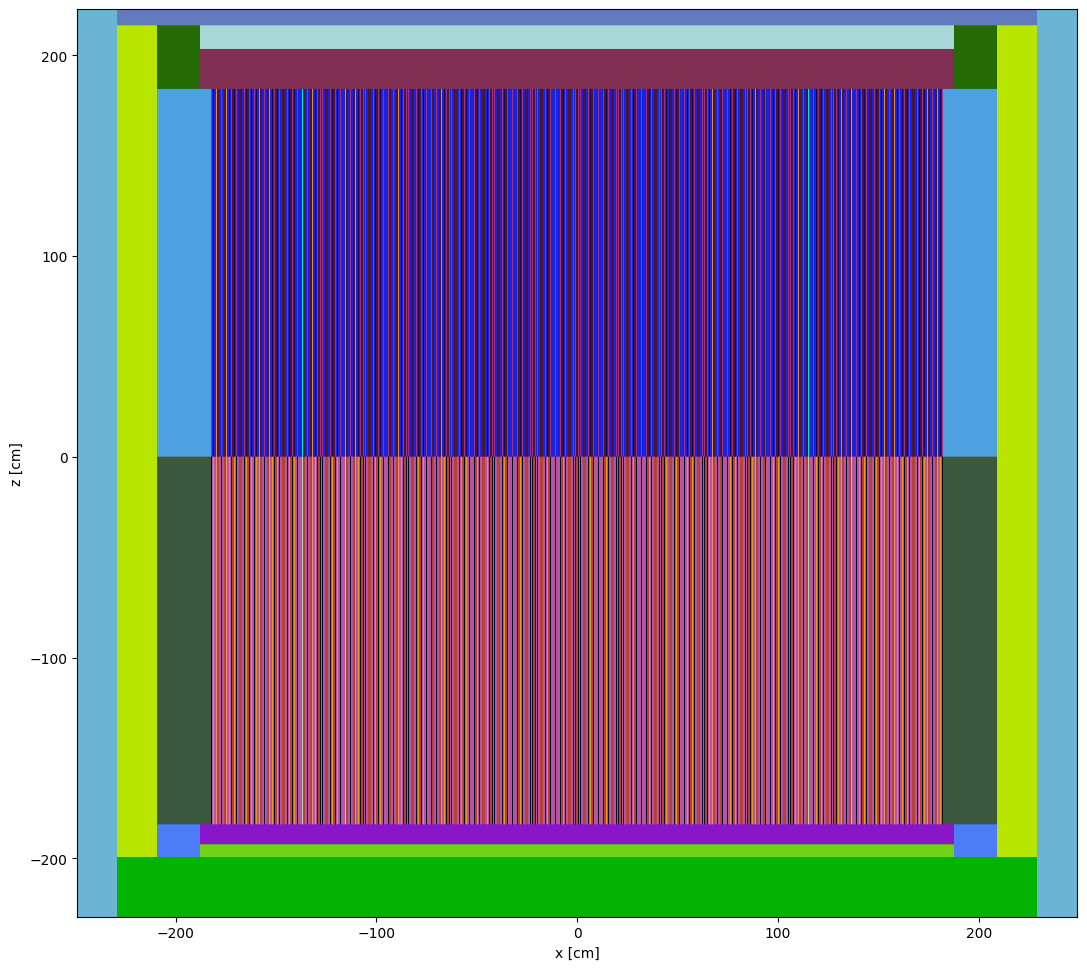

In [9]:
geom.plot(pixels=(1000,1000), basis='xz')

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

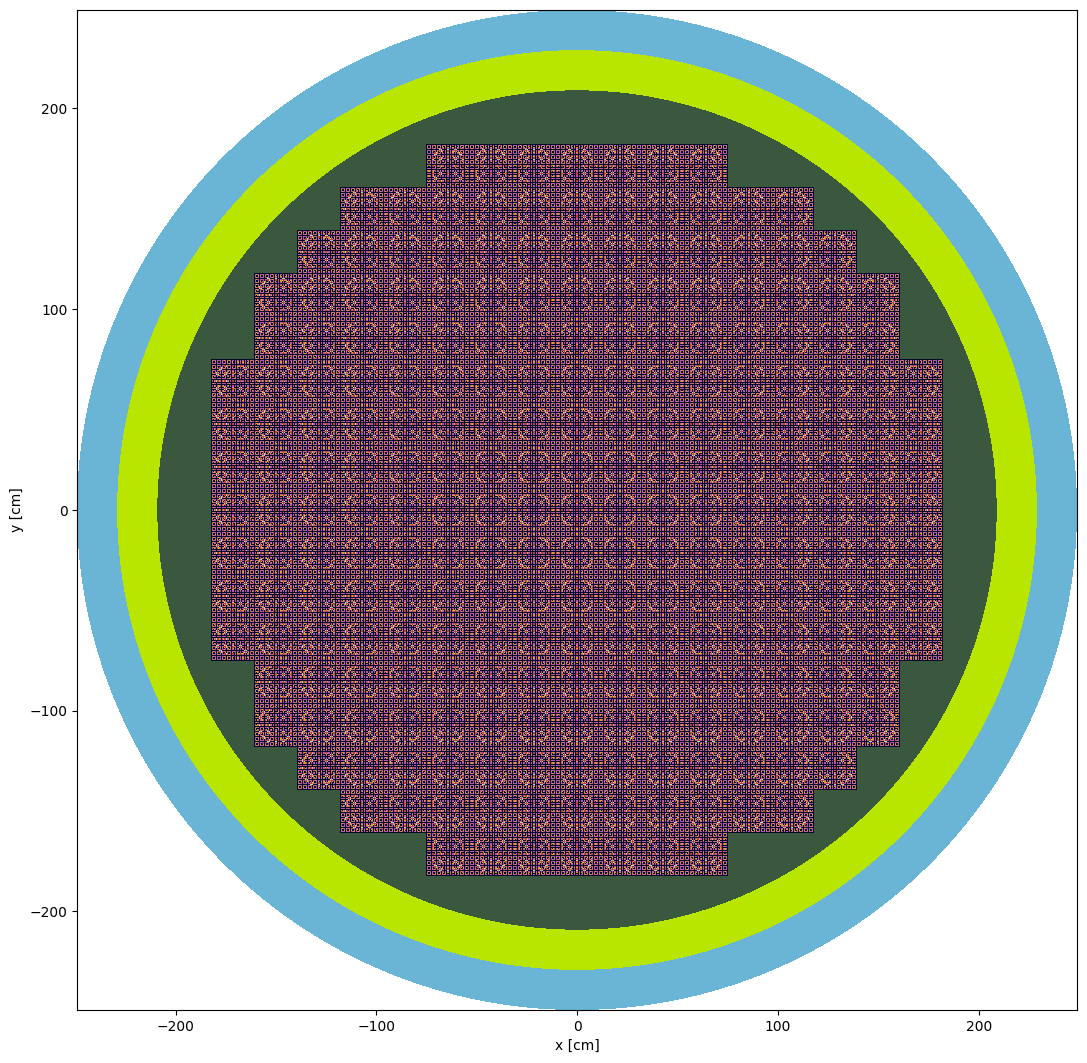

In [10]:
geom.plot(pixels=(1000,1000), basis='xy')

In [11]:
point = openmc.stats.Point((0, 0, 0))
src = openmc.IndependentSource(space=point)
settings = openmc.Settings()
settings.source = src
settings.batches = 100
settings.inactive = 10
settings.particles = 1000
settings.export_to_xml()

In [12]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################